<a href="https://colab.research.google.com/github/sayakpaul/SimCLR-in-TensorFlow-2/blob/master/Linear_Evaluation_Imagenet_Subset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Initial setup

In [1]:
import tensorflow as tf
print(tf.__version__)

2.6.2


In [2]:
!pip3 install tensorflow

  Using cached tensorflow-2.6.2-cp36-cp36m-manylinux2010_x86_64.whl (458.3 MB)
  Using cached typing_extensions-3.7.4.3-py3-none-any.whl (22 kB)
  Using cached h5py-3.1.0-cp36-cp36m-manylinux1_x86_64.whl (4.0 MB)
  Using cached absl_py-0.15.0-py3-none-any.whl (132 kB)
  Using cached termcolor-1.1.0-py3-none-any.whl
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached tensorboard-2.6.0-py3-none-any.whl (5.6 MB)
  Using cached clang-5.0-py3-none-any.whl
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached six-1.15.0-py2.py3-none-any.whl (10 kB)
  Using cached tensorflow_estimator-2.6.0-py2.py3-none-any.whl (462 kB)
  Using cached wrapt-1.12.1-cp36-cp36m-linux_x86_64.whl
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached keras-2.6.0-py2.py3-none-any.whl (1.3 MB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-non

### Restoring model weights from `wandb` run page

In [2]:
simclr_weights = "/home/priyanka-s1/Desktop/Projects/SelfSupervisedLearning/SimCLR-in-TensorFlow-2-master/Pretrained_Weights/20200508-134915resnet_simclr.h5"

In [4]:
!pip3 install scikit-learn

  Using cached scikit_learn-0.24.2-cp36-cp36m-manylinux2010_x86_64.whl (22.2 MB)
  Using cached joblib-1.1.0-py2.py3-none-any.whl (306 kB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)


In [3]:
# Other imports
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
import matplotlib.pyplot as plt
from imutils import paths
from tqdm import tqdm
import tensorflow as tf
import seaborn as sns
import numpy as np
import cv2

# Random seed fixation
tf.random.set_seed(666)
np.random.seed(666)

In [14]:
!pip3 install imutils

  Using cached imutils-0.5.4-py3-none-any.whl


## Dataset gathering and preparation

In [4]:
# Train and test image paths
train_images_10 = list(paths.list_images("/home/priyanka-s1/Desktop/Projects/SelfSupervisedLearning/SimCLR-in-TensorFlow-2-master/DATASET/TRAIN/"))
test_images = list(paths.list_images("/home/priyanka-s1/Desktop/Projects/SelfSupervisedLearning/SimCLR-in-TensorFlow-2-master/DATASET/test/"))
print(len(train_images_10), len(test_images))

460 230


In [13]:
train_images_10[0].split("/")[-2].split("_")[0]

'88'

In [6]:
def prepare_images(image_paths):
    images = []
    labels = []

    for image in tqdm(image_paths):
        image_pixels = plt.imread(image)
        image_pixels = cv2.resize(image_pixels, (224, 224))
        image_pixels = image_pixels/255.

        label = image.split("/")[-2].split("_")[0]

        images.append(image_pixels)
        labels.append(label)

    images = np.array(images)
    labels = np.array(labels)

    #print(images, labels)

    return images, labels

In [7]:
X_train, y_train = prepare_images(train_images_10)
X_test, y_test = prepare_images(test_images)

100%|██████████| 230/230 [00:01<00:00, 171.62it/s]


In [8]:
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

In [30]:
y_test_enc

array([19, 19, 19, 19, 19, 19, 19, 19, 19, 19,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 21, 21, 21, 21, 21, 21, 21, 21,
       21, 21, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 17, 17, 17, 17, 17,
       17, 17, 17, 17, 17, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 14, 14,
       14, 14, 14, 14, 14, 14, 14, 14,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 13,
       13, 13, 13, 13, 13

In [33]:
y_test[1]

'88'

## Utilities

In [9]:
# Architecture utils
def get_resnet_simclr(hidden_1, hidden_2, hidden_3):
    base_model = tf.keras.applications.ResNet50(include_top=False, weights=None, input_shape=(224, 224, 3))
    base_model.trainable = True
    inputs = Input((224, 224, 3))
    h = base_model(inputs, training=False)
    h = GlobalAveragePooling2D()(h)

    projection_1 = Dense(hidden_1)(h)
    projection_1 = Activation("relu")(projection_1)
    projection_2 = Dense(hidden_2)(projection_1)
    projection_2 = Activation("relu")(projection_2)
    projection_3 = Dense(hidden_3)(projection_2)

    resnet_simclr = Model(inputs, projection_3)

    return resnet_simclr

In [10]:
resnet_simclr = get_resnet_simclr(256, 128, 50)
resnet_simclr.load_weights(simclr_weights)
resnet_simclr.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
resnet50 (Functional)        (None, 7, 7, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               524544    
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0     

In [11]:
def plot_training(H):
	with plt.xkcd():
		plt.plot(H.history["loss"], label="train_loss")
		plt.plot(H.history["val_loss"], label="val_loss")
		plt.plot(H.history["accuracy"], label="train_acc")
		plt.plot(H.history["val_accuracy"], label="val_acc")
		plt.title("Training Loss and Accuracy")
		plt.xlabel("Epoch #")
		plt.ylabel("Loss/Accuracy")
		plt.legend(loc="lower left")
		plt.show()

In [12]:
def get_linear_model(features):
    linear_model = Sequential([Dense(23, input_shape=(features, ), activation="softmax")])
    return linear_model

## Evaluation

In [13]:
resnet_simclr.layers[1].trainable = False
resnet_simclr.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
resnet50 (Functional)        (None, 7, 7, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               524544    
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0     

In [14]:
# Encoder model with non-linear projections
projection = Model(resnet_simclr.input, resnet_simclr.layers[-2].output)

# Extract train and test features
train_features = projection.predict(X_train)
test_features = projection.predict(X_test)

print(train_features.shape, test_features.shape)

(460, 128) (230, 128)


In [15]:
# Early Stopping to prevent overfitting
es = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=2, verbose=2, restore_best_weights=True)

Epoch 1/50
29/29 [==============================] - 1s 7ms/step - loss: 5.6818 - accuracy: 0.0217 - val_loss: 4.5129 - val_accuracy: 0.0565
Epoch 2/50
29/29 [==============================] - 0s 2ms/step - loss: 4.1130 - accuracy: 0.0478 - val_loss: 3.8168 - val_accuracy: 0.0609
Epoch 3/50
29/29 [==============================] - 0s 2ms/step - loss: 3.5351 - accuracy: 0.0652 - val_loss: 3.4864 - val_accuracy: 0.0652
Epoch 4/50
29/29 [==============================] - 0s 2ms/step - loss: 3.2040 - accuracy: 0.0913 - val_loss: 3.3071 - val_accuracy: 0.0652
Epoch 5/50
29/29 [==============================] - 0s 2ms/step - loss: 2.9838 - accuracy: 0.1196 - val_loss: 3.1824 - val_accuracy: 0.0870
Epoch 6/50
29/29 [==============================] - 0s 2ms/step - loss: 2.8330 - accuracy: 0.1370 - val_loss: 3.1164 - val_accuracy: 0.0826
Epoch 7/50
29/29 [==============================] - 0s 2ms/step - loss: 2.7311 - accuracy: 0.1739 - val_loss: 3.0717 - val_accuracy: 0.1043
Epoch 8/50
29/29 [==

findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Neue', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.
findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Neue', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.


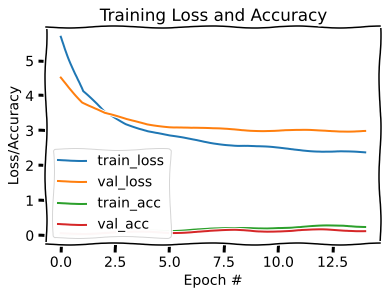

In [16]:
# Linear model

linear_model = get_linear_model(128)
linear_model.compile(loss="sparse_categorical_crossentropy", metrics=["accuracy"],
                     optimizer="adam")
history = linear_model.fit(train_features, y_train_enc,
                 validation_data=(test_features, y_test_enc),
                 batch_size=16,
                 epochs=50,
                 callbacks=[es])
plot_training(history)

In [26]:
# Encoder model with less non-linearity
projection = Model(resnet_simclr.input, resnet_simclr.layers[-4].output)

# Extract train and test features
train_features = projection.predict(X_train)
test_features = projection.predict(X_test)

print(train_features.shape, test_features.shape)

(460, 256) (230, 256)


Epoch 1/50
29/29 [==============================] - 1s 8ms/step - loss: 4.9094 - accuracy: 0.0565 - val_loss: 4.0169 - val_accuracy: 0.0565
Epoch 2/50
29/29 [==============================] - 0s 3ms/step - loss: 3.6047 - accuracy: 0.0913 - val_loss: 3.4879 - val_accuracy: 0.0783
Epoch 3/50
29/29 [==============================] - 0s 3ms/step - loss: 3.2146 - accuracy: 0.1130 - val_loss: 3.2860 - val_accuracy: 0.1087
Epoch 4/50
29/29 [==============================] - 0s 3ms/step - loss: 3.0217 - accuracy: 0.1304 - val_loss: 3.1784 - val_accuracy: 0.1000
Epoch 5/50
29/29 [==============================] - 0s 3ms/step - loss: 2.9254 - accuracy: 0.1217 - val_loss: 3.0807 - val_accuracy: 0.1174
Epoch 6/50
29/29 [==============================] - 0s 3ms/step - loss: 2.8594 - accuracy: 0.1370 - val_loss: 3.0466 - val_accuracy: 0.1000
Epoch 7/50
29/29 [==============================] - 0s 3ms/step - loss: 2.8166 - accuracy: 0.1457 - val_loss: 3.0839 - val_accuracy: 0.1000
Epoch 8/50
29/29 [==

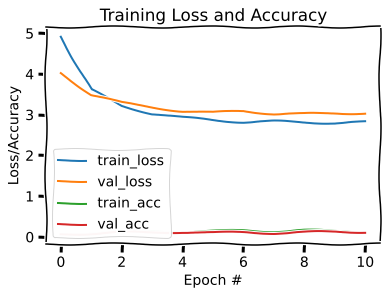

In [27]:
#wandb.init(project="simclr", id="linear-eval-relu-second-last")

linear_model = get_linear_model(256)
linear_model.compile(loss="sparse_categorical_crossentropy", metrics=["accuracy"],
                     optimizer="adam")
history = linear_model.fit(train_features, y_train_enc,
                 validation_data=(test_features, y_test_enc),
                 batch_size=16,
                 epochs=50,
                 callbacks=[es])
plot_training(history)

In [28]:
# Encoder model with no projection
projection = Model(resnet_simclr.input, resnet_simclr.layers[-6].output)

# Extract train and test features
train_features = projection.predict(X_train)
test_features = projection.predict(X_test)

print(train_features.shape, test_features.shape)

(460, 2048) (230, 2048)


Epoch 1/50
8/8 [==============================] - 1s 27ms/step - loss: 3.9615 - accuracy: 0.0370 - val_loss: 3.6868 - val_accuracy: 0.0826
Epoch 2/50
8/8 [==============================] - 0s 7ms/step - loss: 3.4706 - accuracy: 0.1109 - val_loss: 3.2647 - val_accuracy: 0.0870
Epoch 3/50
8/8 [==============================] - 0s 7ms/step - loss: 3.1254 - accuracy: 0.1370 - val_loss: 3.2489 - val_accuracy: 0.1087
Epoch 4/50
8/8 [==============================] - 0s 7ms/step - loss: 2.9844 - accuracy: 0.1391 - val_loss: 3.2393 - val_accuracy: 0.1261
Epoch 5/50
8/8 [==============================] - 0s 7ms/step - loss: 3.0009 - accuracy: 0.1391 - val_loss: 3.0520 - val_accuracy: 0.1348
Epoch 6/50
8/8 [==============================] - 0s 7ms/step - loss: 2.9116 - accuracy: 0.1696 - val_loss: 3.0603 - val_accuracy: 0.0957
Epoch 7/50
8/8 [==============================] - 0s 7ms/step - loss: 2.8457 - accuracy: 0.1696 - val_loss: 3.0799 - val_accuracy: 0.1174
Restoring model weights from the 

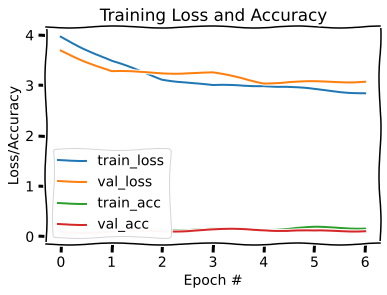

In [29]:
#wandb.init(project="simclr", id="linear-eval-no-projections")

linear_model = get_linear_model(2048)
linear_model.compile(loss="sparse_categorical_crossentropy", metrics=["accuracy"],
                     optimizer="adam")
history = linear_model.fit(train_features, y_train_enc,
                 validation_data=(test_features, y_test_enc),
                 batch_size=64,
                 epochs=50,
                 callbacks=[es])
plot_training(history)

In [20]:
score=linear_model.evaluate(test_features, y_test_enc, verbose=0)

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 2.98748517036438
Test accuracy: 0.13913042843341827


In [38]:
pred = linear_model.predict(test_features) 
pred = np.argmax(pred, axis = 1)
label = y_test_enc #np.argmax(y_test_enc)

print(pred) 
print(label)

[20  8  0  2 20 19 18  4 11  0  3 13 20 19 21 21 16  3 20 21  4  7  6  5
 21  7  3 18  5 18  7 11  1 13 15  0  0  8  0  9  0  0 16  7 21  7 13 21
 19  0 11 14 19 19 14 19 13 11 19 17  3 21 19 13 20  3 13  0 19 13 19  9
 20  7  7  2  9  2 10 20  0  9  3 21 13 13  4  9  0  0  0 18  8  5  7  2
  3 17  0  1 16 14  8  6  5 14  4 17  7 14 20 18 19  9  1 17 18 19  5  9
 22 10 17 22  0 10 11  9  8 22 20 22  1 20 20  2 20  9 20  0  5  5 13 16
 18 17  7  1  5  9  7  7  7 18  8  5 10  7  6  3  8  8 14 20 19  7  6  8
 14 15 19  5 21  1 20 17 12  1 12 13 22  7 20 19 19 21  5 17  8  7  8  9
 19  9 22 11 20  5  3 11 20  8 15  5  8  7 18  5  1  7 11 11  1  7  9 11
  3  5  9 11  3 13  0 21  6 13  0 21 13 13]
[19 19 19 19 19 19 19 19 19 19  3  3  3  3  3  3  3  3  3  3  4  4  4  4
  4  4  4  4  4  4  8  8  8  8  8  8  8  8  8  8  0  0  0  0  0  0  0  0
  0  0 12 12 12 12 12 12 12 12 12 12 21 21 21 21 21 21 21 21 21 21 22 22
 22 22 22 22 22 22 22 22 17 17 17 17 17 17 17 17 17 17 15 15 15 15 15 15
 15 15 

In [27]:
print(label)

70


In [40]:
from sklearn.metrics import confusion_matrix

confusion_matrix(label, pred, labels=label)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 4]])